In [12]:
%load_ext watermark
%watermark -v --packages numpy,pandas,matplotlib,torch,lightning

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.20.0

numpy     : 1.26.3
pandas    : 2.1.4
matplotlib: 3.8.2
torch     : 2.1.2
lightning : not installed



### 2) Load the dataset

In [19]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
train_dataset = datasets.MNIST(
    root='data', train=True, transform=transforms.ToTensor(), 
    download=True
)

test_dataset = datasets.MNIST(
    root='data', train=False, transform=transforms.ToTensor(),
)


In [20]:
len(train_dataset)

60000

In [21]:
len(test_dataset)

10000

In [22]:
from torch.utils.data.dataset import random_split

train_dataset, val_dataset = random_split(train_dataset, lengths=[55000, 5000])

In [25]:
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=32,
    shuffle=True,
)

val_loader = DataLoader(
    dataset=val_dataset,
    batch_size=32,
    shuffle=False,
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=32,
    shuffle=False,
)

#### Counting the instances of different labels in training, valid, test datasets

In [28]:
from collections import Counter

train_counter = Counter()
for images, labels in train_loader:
    train_counter.update(labels.tolist())

print("\nTraining label distribution:")
print(sorted(train_counter.items()))


val_counter = Counter()
for images, labels in val_loader:
    val_counter.update(labels.tolist())

print("\Valid label distribution:")
print(sorted(val_counter.items()))


test_counter = Counter()
for images, labels in test_loader:
    test_counter.update(labels.tolist())

print("\Test label distribution:")
print(sorted(test_counter.items()))


Training label distribution:
[(0, 5406), (1, 6206), (2, 5464), (3, 5614), (4, 5347), (5, 4996), (6, 5402), (7, 5731), (8, 5380), (9, 5454)]
\Valid label distribution:
[(0, 517), (1, 536), (2, 494), (3, 517), (4, 495), (5, 425), (6, 516), (7, 534), (8, 471), (9, 495)]
\Test label distribution:
[(0, 980), (1, 1135), (2, 1032), (3, 1010), (4, 982), (5, 892), (6, 958), (7, 1028), (8, 974), (9, 1009)]


#### Majority rule classifier

In [29]:
majority_class = test_counter.most_common(1)[0]
print("Majority class: " , majority_class[0])

baseline_acc = majority_class[1]/sum(test_counter.values())
print("Accuracy when always predicting the majority class: ")
print(f'{baseline_acc:.2f} ({baseline_acc*100:2f}%)')

Majority class:  1
Accuracy when always predicting the majority class: 
0.11 (11.350000%)


### Visual check

<function matplotlib.pyplot.show(close=None, block=None)>

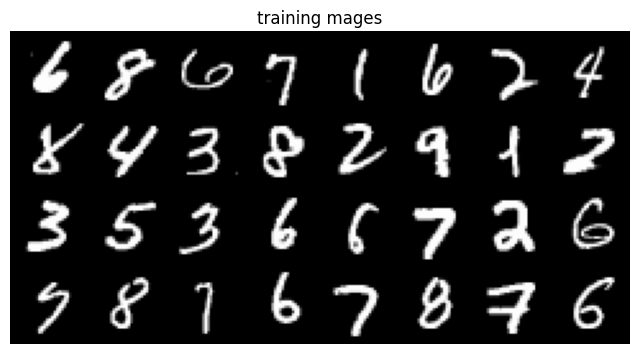

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np 
import torchvision 

for images, labels in train_loader:
    break

plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("training mages")
plt.imshow(np.transpose(torchvision.utils.make_grid(
    images[:64],
    padding=2,
    normalize=True),
    (1,2,0)
))
plt.show